# CARNEGIE MELLON UNIVERSITY

**Name**: Junxiao Guo

**Andrew ID**: junxiaog

**Course**: DATA, INFERENCE & APPLIED MACHINE LEARNING (COURSE 18-785)

**ASSIGNMENT 4**

In [1]:
# %config IPCompleter.greedy=True
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scipy
# !pip install sklearn
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import matplotlib.dates as mdates 
import seaborn as seabornInstance 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import sys
%matplotlib inline


## Question 1

In [3]:
def get_monthly_retrun(inputarr):
    mr = []
    for i in range(1,len(inputarr)):
        mr.append((inputarr[i]-inputarr[i-1])/inputarr[i-1])
    return np.array(mr)
    

312 312
(311, 1) (311, 1)
Interception:  [-0.00123126]
Correlation Coefficient: [[-0.07393996]]


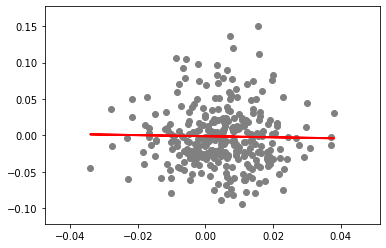

In [4]:
f_monthly = pd.read_excel('monthly.xls',sheet_name='Monthly')
f_ftse = pd.read_csv('FTSE100.csv')
house_date,house_price = f_monthly['Unnamed: 0'],f_monthly['Average House Price']
housepos = f_monthly.loc[f_monthly['Unnamed: 0'] == '2016-12-01'].index[0]
house_date,house_price = house_date[:housepos+1],house_price[:housepos+1]
ftse_date,ftse_index = f_ftse['Date'].astype('datetime64[ns]') ,f_ftse['Adj Close']
# FTSE monthly return
ftse_list = np.array(ftse_index)
house_list = np.array(house_price)
print(len(ftse_list),len(house_list))
ftse_mr,house_mr = get_monthly_retrun(ftse_list),get_monthly_retrun(house_list)

Y = ftse_mr.reshape(-1,1)  # Dependent variable
X = house_mr.reshape(-1,1) # Explanatory Variable
print(X.shape,Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print("Interception: ",regressor.intercept_)
#For retrieving the slope:
print("Correlation Coefficient:",regressor.coef_)

y_pred = regressor.predict(X)
plt.scatter(X, Y,  color='gray')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.show()


## Answer 1

### I. What do the result tell us

### II. Hypothsis to bakcup conclusion about existence of a signifcant relationship between these two variables

## Question 2

In [5]:
college_info = pd.read_csv('College.csv')
college_info.rename(columns={"Unnamed: 0":"Name"})
newdf = college_info[["Apps","Enroll","Outstate","Top10perc","Top25perc"]].copy()
print("********* Correlation coefficients of the variables *********")
print(newdf.corr()) # Correlation Coeficient

********* Correlation coefficients of the variables *********
               Apps    Enroll  Outstate  Top10perc  Top25perc
Apps       1.000000  0.846822  0.050159   0.338834   0.351640
Enroll     0.846822  1.000000 -0.155477   0.181294   0.226745
Outstate   0.050159 -0.155477  1.000000   0.562331   0.489394
Top10perc  0.338834  0.181294  0.562331   1.000000   0.891995
Top25perc  0.351640  0.226745  0.489394   0.891995   1.000000


In [6]:
# b) StepWise linear regression Model
# c) Which predictor variables are useful in predicting the graduation rate? Exxplain how you got those variables.
# d) Would the set of predictor variables be useful in predicting the graduation reate if you
#    werer to use BIC to select the model? Why?
# e) Compare the accurate of the model using only useful predictors with the one of the model using 
#    all five predictors?
# f) Given a set of predictor corresponding to CMU, what graduation rate value should the moset accurate model predict?



## Question 3

## Question 4

In [7]:
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures


isr_lur = pd.read_csv("ODA-ISR_LUR.csv")
endpos = isr_lur.loc[isr_lur['Date'] == '2013-12-31'].index[0]
endpos_2020 = isr_lur.loc[isr_lur['Date'] == '2020-12-31'].index[0]
date_to_2020 = np.array(pd.to_datetime(isr_lur.tail(len(isr_lur)-endpos_2020)['Date']).map(dt.datetime.toordinal)).reshape(-1,1)
# print(date_to_2020)
isr_lur = isr_lur.tail(len(isr_lur)-endpos)
isr_lur['Date'] = pd.to_datetime(isr_lur['Date'])
isr_lur_val = np.array(isr_lur['Value'])

plt.plot(isr_lur['Date'], isr_lur_val, color='red', linewidth=2)
plt.show()
isr_lur_date = np.array(isr_lur['Date'].map(dt.datetime.toordinal))



X = isr_lur_date.reshape(-1,1)  # Dependent variable
Y = isr_lur_val.reshape(-1,1) # Explanatory Variable
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9, random_state=0)
X_train, Y_train = X,Y

regressor = LinearRegression()  
# regressor = linear_model.Ridge(alpha=.1)
regressor.fit(X_train, Y_train) #training the algorithm
#To retrieve the intercept:
print("Interception: ",regressor.intercept_)
print("Correlation Coefficient:",regressor.coef_)
y_pred = regressor.predict(date_to_2020)
x_date = [dt.datetime.fromordinal(i) for i in date_to_2020]
plt.plot(x_date, y_pred, color='red', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Predicted Israel Unemployment Rate\n (% of Total Labor Force)")
plt.show()


NameError: name 'isr_lur_date' is not defined